In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [4]:
#Using the 30 second dataset as it has less records and less is better for KNNs as it is a "lazy learning" algorithm
df_30_sec = pd.read_csv('../Data/features_30_sec.csv')
df_30_sec.head()
#Creating the labelled data X and Y
x_records = df_30_sec.drop(columns = ['filename','length','label'])
print(len(x_records.columns))
y_records = df_30_sec['label']

57


In [5]:
#Splitting our data into testing and training data using a 20% split

x_train,x_test,y_train,y_test = train_test_split(x_records,y_records,test_size=0.2)

In [6]:
#Feature scaling
scaler_X = StandardScaler()
x_train = scaler_X.fit_transform(x_train)
x_test = scaler_X.fit_transform(x_test)

In [7]:
#KNN model
K = len(x_train)
print(K)
KNN_Classifier =  KNeighborsClassifier(n_neighbors = int(K ** 0.5),p = 57,metric='euclidean')

800


In [8]:
#Fitting the model

KNN_Classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=28, p=57)

In [9]:
#Accuracy Score is:

y_predictions = KNN_Classifier.predict(x_test)
acc = accuracy_score(y_test,y_predictions)
print("Accuracy we found is: ",acc*100,"%")

Accuracy we found is:  58.5 %


Barebones Confusion matrix is:
 [[ 8  0  3  1  0  1  3  0  0  0]
 [ 0 22  0  0  0  1  0  0  0  0]
 [ 0  1 15  4  0  0  0  0  0  2]
 [ 0  0  1  8  1  0  0  2  0  1]
 [ 0  0  0  3  5  0  2  5  1  0]
 [ 1  2  1  4  0 10  0  1  0  3]
 [ 1  0  0  1  0  0 14  0  0  3]
 [ 0  0  1  1  0  0  0 13  0  0]
 [ 1  0  6  1  3  0  0  3 15  0]
 [ 0  0  5  9  0  1  0  1  2  7]]


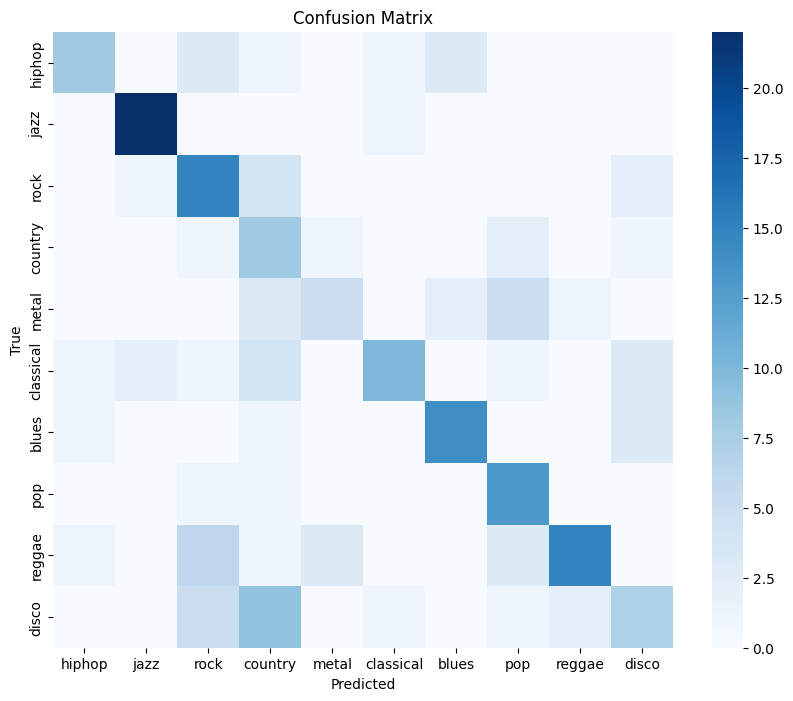

In [10]:
#Evaluation metrics
#Confusion Matrix


conf_matrix = confusion_matrix(y_test,y_predictions)
print("Barebones Confusion matrix is:\n",conf_matrix)


class_names = list(set(y_test))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=False, fmt='g',cbar = True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:
#Classification Report is:

print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

       blues       0.73      0.50      0.59        16
   classical       0.88      0.96      0.92        23
     country       0.47      0.68      0.56        22
       disco       0.25      0.62      0.36        13
      hiphop       0.56      0.31      0.40        16
        jazz       0.77      0.45      0.57        22
       metal       0.74      0.74      0.74        19
         pop       0.52      0.87      0.65        15
      reggae       0.83      0.52      0.64        29
        rock       0.44      0.28      0.34        25

    accuracy                           0.58       200
   macro avg       0.62      0.59      0.58       200
weighted avg       0.64      0.58      0.59       200

